# Data together with Wonder Week data

## Import stuff

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.signal import savgol_filter

## Load data

bt = baby tracker & ww = wonder week

In [2]:
bt_data = pd.read_csv('./day_sleep_feed_diaper.csv')

In [3]:
ww_data = pd.read_csv('./wonder_week_data.csv')

## Fix the data

In [4]:
# merge into one data frame
data = bt_data.merge(ww_data, left_on='Date', right_on='date')
data

,Date,Duration_sleep,Times_sleep,Duration_feed,Times_feed,Times_diaper,date,status
0,2018-06-18,837,6,89,12,9,2018-06-18,0
1,2018-06-19,956,6,74,10,10,2018-06-19,0
2,2018-06-20,975,7,67,12,6,2018-06-20,0
3,2018-06-21,894,6,83,13,9,2018-06-21,0
4,2018-06-22,895,6,77,14,8,2018-06-22,0
5,2018-06-23,836,8,85,14,9,2018-06-23,0
6,2018-06-24,1016,6,80,14,7,2018-06-24,0
7,2018-06-25,976,7,97,14,9,2018-06-25,0
8,2018-06-26,897,9,107,15,7,2018-06-26,0
9,2018-06-27,1033,8,117,13,8,2018-06-27,0


In [5]:
# drop column that we do not need
data = data.drop(['date'], axis=1)
data.head(3)

,Date,Duration_sleep,Times_sleep,Duration_feed,Times_feed,Times_diaper,status
0,2018-06-18,837,6,89,12,9,0
1,2018-06-19,956,6,74,10,10,0
2,2018-06-20,975,7,67,12,6,0


STATUS:
0 = ok,
1 = bad,
2 = happy,
3 = worse

### Export data

In [6]:
# Save to CSV
data.to_csv('tracker_ww_data.csv')

In [7]:
# Look at correlations both in graph and on heatmaps etc...

### Heat map duration and ww

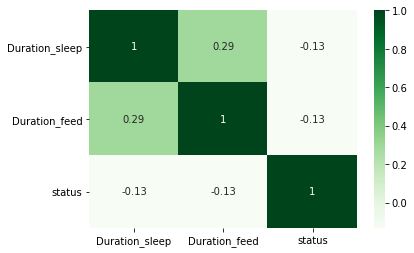

In [8]:
sns.heatmap(data[['Duration_sleep','Duration_feed', 'status']].corr(), annot = True, cmap="Greens")

### Heat map times and ww

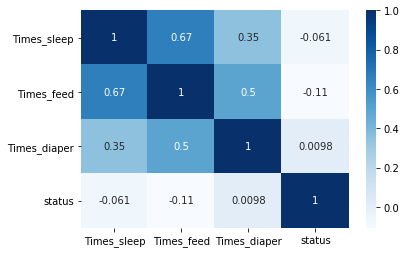

In [9]:
sns.heatmap(data[['Times_sleep','Times_feed', 'Times_diaper', 'status']].corr(), annot = True, cmap="Blues")

There do not seem to be any correlation btw status and the other variables. 

### Graphical trend (duration sleep and status)

In [10]:
data.describe()

,Duration_sleep,Times_sleep,Duration_feed,Times_feed,Times_diaper,status
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,805.273810,6.380952,63.634921,9.801587,6.956349,0.591270
std,129.220126,1.611004,34.313205,3.527964,1.612353,0.634031
min,368.000000,2.000000,3.000000,1.000000,1.000000,0.000000
25%,735.250000,5.000000,38.000000,8.000000,6.000000,0.000000
50%,805.000000,6.000000,63.000000,10.000000,7.000000,1.000000
75%,872.000000,7.000000,80.000000,12.000000,8.000000,1.000000
max,1205.000000,11.000000,152.000000,19.000000,13.000000,3.000000


We have to work a little bit on the status to change the number 0-3 in the status so that we can use it visually.

0 = ok, 1 = bad, 2 = happy, 3 = worse

### Sleep duration vs. Wonder Weeks leaps

In [11]:
data['status_d_sleep'] = data['status'].replace([0, 1, 2, 3] , [800, 780, 800, 780])

In [12]:
data.head()

,Date,Duration_sleep,Times_sleep,Duration_feed,Times_feed,Times_diaper,status,status_d_sleep
0,2018-06-18,837,6,89,12,9,0,800
1,2018-06-19,956,6,74,10,10,0,800
2,2018-06-20,975,7,67,12,6,0,800
3,2018-06-21,894,6,83,13,9,0,800
4,2018-06-22,895,6,77,14,8,0,800


/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


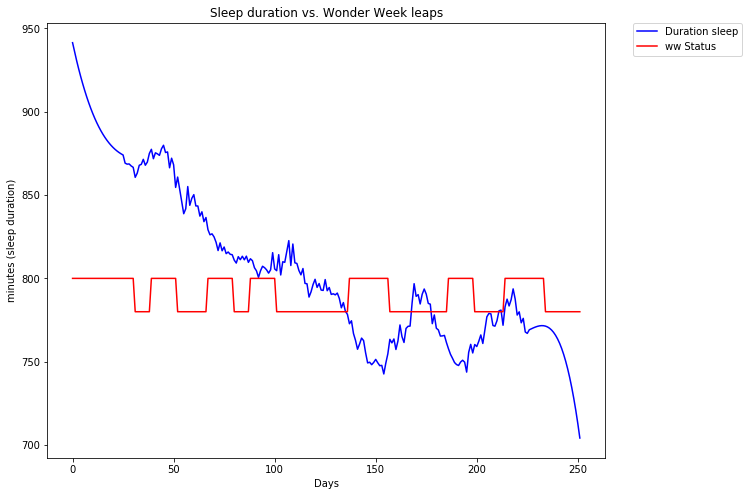

In [13]:
y1 = data.Duration_sleep.values
x1 = data.index.values
y1hat = savgol_filter(y1, 51, 3) # window size 51, polynomial order 3

y2 = data.status_d_sleep.values
x2 = data.index.values

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

ax.plot(x1, y1hat, label="Duration sleep", color='b')
ax.plot(x2, y2, label="ww Status", color='r')

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('Days')
plt.ylabel('minutes (sleep duration)')
plt.title('Sleep duration vs. Wonder Week leaps')

plt.rc('axes', titlesize=16)     
plt.rc('axes', labelsize=12)    
plt.rc('xtick', labelsize=12)   
plt.rc('figure', titlesize=12)  
 
plt.show();

800 = ok and happy, 780 = bad and worse

#### Quick look at the difference in smoothing data

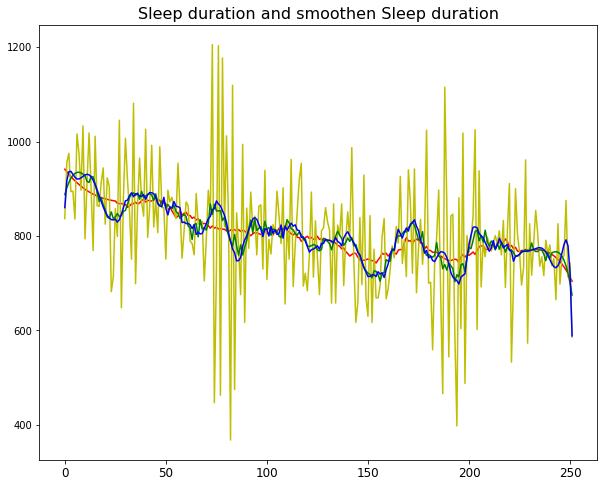

In [14]:
# Smoothen data 1
y1 = data.Duration_sleep.values
x1 = data.index.values
y1hat = savgol_filter(y1, 51, 3)

# Non smoothen data
y2 = data.Duration_sleep.values
x2 = data.index.values

# Smoothen data 2
y3 = data.Duration_sleep.values
x3 = data.index.values
y3hat = savgol_filter(y3, 21, 3) # lower window size

# Smoothen data 3
y4 = data.Duration_sleep.values
x4 = data.index.values
y4hat = savgol_filter(y4, 51, 11) # higher polynomial order

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

ax.plot(x1, y1hat, color='r')
ax.plot(x2, y2, color='y')
ax.plot(x3, y3hat, color='g')
ax.plot(x4, y4hat, color='b')

plt.title('Sleep duration and smoothen Sleep duration')
 
plt.show();

### Feed duration vs. Wonder Weeks leaps

In [15]:
data['status_d_feed'] = data['status'].replace([0, 1, 2, 3] , [63, 60, 63, 60])
data.head()

,Date,Duration_sleep,Times_sleep,Duration_feed,Times_feed,Times_diaper,status,status_d_sleep,status_d_feed
0,2018-06-18,837,6,89,12,9,0,800,63
1,2018-06-19,956,6,74,10,10,0,800,63
2,2018-06-20,975,7,67,12,6,0,800,63
3,2018-06-21,894,6,83,13,9,0,800,63
4,2018-06-22,895,6,77,14,8,0,800,63


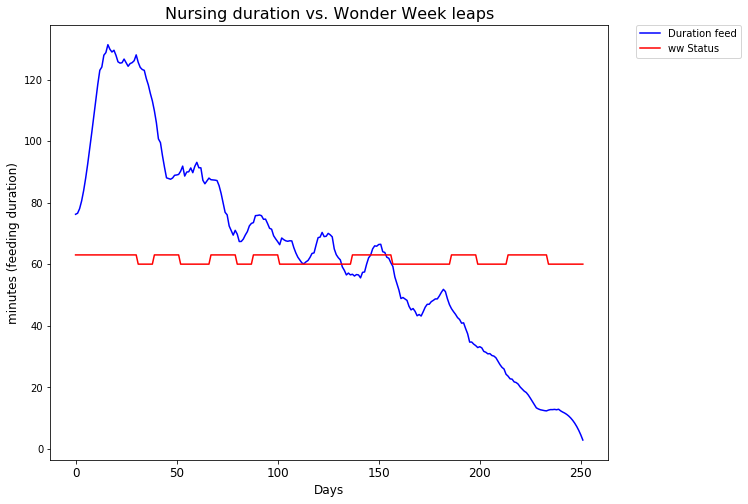

In [16]:
y1 = data.Duration_feed.values
x1 = data.index.values
y1hat = savgol_filter(y1, 21, 3) # window size, polynomial order

y2 = data.status_d_feed.values
x2 = data.index.values

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

ax.plot(x1, y1hat, label="Duration feed", color='b')
ax.plot(x2, y2, label="ww Status", color='r')

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('Days')
plt.ylabel('minutes (feeding duration)')
plt.title('Nursing duration vs. Wonder Week leaps')

plt.rc('axes', titlesize=16)     
plt.rc('axes', labelsize=12)    
plt.rc('xtick', labelsize=12)   
plt.rc('figure', titlesize=12)  
 
plt.show();

### Number of diapers vs. Wonder Weeks leaps

In [17]:
data['status_t_diaper'] = data['status'].replace([0, 1, 2, 3] , [7, 6, 7, 6])
data.head()

,Date,Duration_sleep,Times_sleep,Duration_feed,Times_feed,Times_diaper,status,status_d_sleep,status_d_feed,status_t_diaper
0,2018-06-18,837,6,89,12,9,0,800,63,7
1,2018-06-19,956,6,74,10,10,0,800,63,7
2,2018-06-20,975,7,67,12,6,0,800,63,7
3,2018-06-21,894,6,83,13,9,0,800,63,7
4,2018-06-22,895,6,77,14,8,0,800,63,7


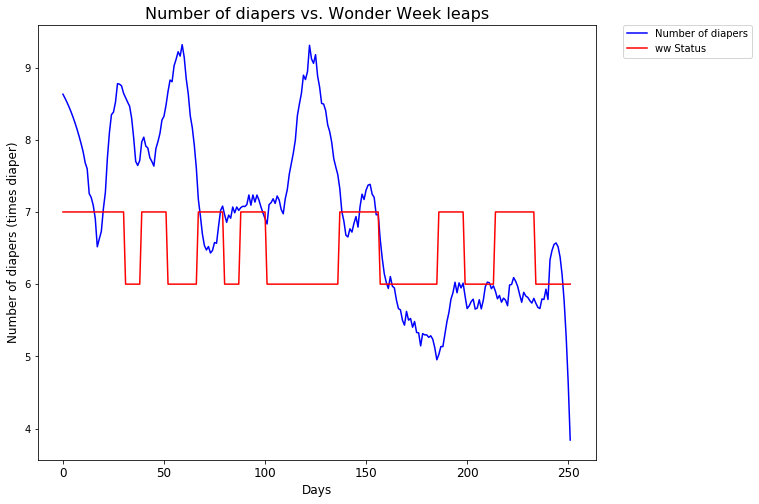

In [18]:
y1 = data.Times_diaper.values
x1 = data.index.values
y1hat = savgol_filter(y1, 21, 3) # window size, polynomial order

y2 = data.status_t_diaper.values
x2 = data.index.values

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

ax.plot(x1, y1hat, label="Number of diapers", color='b')
ax.plot(x2, y2, label="ww Status", color='r')

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('Days')
plt.ylabel('Number of diapers (times diaper)')
plt.title('Number of diapers vs. Wonder Week leaps')

plt.rc('axes', titlesize=16)     
plt.rc('axes', labelsize=12)    
plt.rc('xtick', labelsize=12)   
plt.rc('figure', titlesize=12)  
 
plt.show();